In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

NameError: name 'cities' is not defined

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
cities

['kysyl-syr',
 'amderma',
 'dikson',
 'yellowknife',
 'port alfred',
 'hilo',
 'bundaberg',
 'vaini',
 'salas',
 'cape town',
 'progreso',
 'atuona',
 'albany',
 'tiksi',
 'port elizabeth',
 'vestmannaeyjar',
 'arcata',
 'kruisfontein',
 'jamestown',
 'mogwase',
 'boyolangu',
 'kapaa',
 'toliary',
 'nushki',
 'busselton',
 'antofagasta',
 'east london',
 'mataura',
 'georgetown',
 'naze',
 'kodiak',
 'tambo',
 'puerto ayora',
 'port hedland',
 'torbay',
 'mahebourg',
 'ribeira grande',
 'provideniya',
 'lahaina',
 'cherskiy',
 'los corrales de buelna',
 'new norfolk',
 'hermanus',
 'ushuaia',
 'bonavista',
 'avarua',
 'taolanaro',
 'bitung',
 'leon',
 'bowen',
 'sarkand',
 'berlevag',
 'iquitos',
 'severo-kurilsk',
 'saskylakh',
 'celica',
 'saint-augustin',
 'moose factory',
 'alice springs',
 'bengkulu',
 'mys shmidta',
 'katsuura',
 'dwarka',
 'sioux lookout',
 'maumere',
 'tonantins',
 'gwembe',
 'rikitea',
 'dunedin',
 'shimoda',
 'valente',
 'namibe',
 'chokurdakh',
 'victoria',


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kysyl-syr
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | bundaberg
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | salas
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | progreso
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | arcata
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | mogwase
Processing Record 21 of Set 1 | boyolangu
Processing Record 22 of Set 1 | kapaa
Processing Record 

Processing Record 38 of Set 4 | tiarei
Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | ikongo
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | batsfjord
Processing Record 44 of Set 4 | le port
Processing Record 45 of Set 4 | lensk
Processing Record 46 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | kangundo
Processing Record 49 of Set 4 | gelibolu
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | ponta delgada
Processing Record 2 of Set 5 | camacha
Processing Record 3 of Set 5 | jaguarao
Processing Record 4 of Set 5 | zyryanka
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | lufilufi
Processing Record 9 of Set 5 | chernyshevskiy
Processing Record 10 of Set 5

Processing Record 24 of Set 8 | bud
Processing Record 25 of Set 8 | izumo
Processing Record 26 of Set 8 | beidao
Processing Record 27 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 8 | sobolevo
Processing Record 29 of Set 8 | soke
Processing Record 30 of Set 8 | massakory
Processing Record 31 of Set 8 | atasu
Processing Record 32 of Set 8 | takoradi
Processing Record 33 of Set 8 | sisimiut
Processing Record 34 of Set 8 | clarksburg
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | samarai
Processing Record 37 of Set 8 | raudeberg
Processing Record 38 of Set 8 | chicama
Processing Record 39 of Set 8 | nebolchi
Processing Record 40 of Set 8 | shache
Processing Record 41 of Set 8 | mandera
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | novonikolayevskiy
Processing Record 45 of Set 8 | alindao
Processing Record 46 of Set 8 | attawapiskat
City not found. Skipping...
Processing Re

Processing Record 15 of Set 12 | verkhoshizhemye
Processing Record 16 of Set 12 | isangel
Processing Record 17 of Set 12 | valday
Processing Record 18 of Set 12 | lishan
Processing Record 19 of Set 12 | obo
Processing Record 20 of Set 12 | agirish
Processing Record 21 of Set 12 | zaysan
Processing Record 22 of Set 12 | huanren
Processing Record 23 of Set 12 | maceio
Processing Record 24 of Set 12 | falam
Processing Record 25 of Set 12 | barra do garcas
Processing Record 26 of Set 12 | herat
Processing Record 27 of Set 12 | mount hagen
Processing Record 28 of Set 12 | prainha
Processing Record 29 of Set 12 | atherton
Processing Record 30 of Set 12 | mastic beach
Processing Record 31 of Set 12 | bassano
Processing Record 32 of Set 12 | mentok
City not found. Skipping...
Processing Record 33 of Set 12 | port hardy
Processing Record 34 of Set 12 | portland
Processing Record 35 of Set 12 | port lincoln
Processing Record 36 of Set 12 | sabang
Processing Record 37 of Set 12 | smithers
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kysyl-Syr,63.8986,122.7617,28.08,86,95,11.95,RU,2022-05-13 17:23:56
1,Dikson,73.5069,80.5464,32.88,98,100,10.56,RU,2022-05-13 17:23:56
2,Yellowknife,62.4560,-114.3525,54.12,43,75,9.22,CA,2022-05-13 17:23:57
3,Port Alfred,-33.5906,26.8910,60.19,87,13,1.99,ZA,2022-05-13 17:23:58
4,Hilo,19.7297,-155.0900,77.29,83,0,6.91,US,2022-05-13 17:23:58
5,Bundaberg,-24.8500,152.3500,69.22,99,100,8.05,AU,2022-05-13 17:23:59
6,Vaini,-21.2000,-175.2000,71.76,73,20,13.80,TO,2022-05-13 17:23:59
7,Salas,43.4118,-6.2602,62.96,80,79,5.91,ES,2022-05-13 17:24:00
8,Cape Town,-33.9258,18.4232,59.88,83,20,9.22,ZA,2022-05-13 17:24:00
9,Progreso,21.2833,-89.6667,87.91,51,0,11.27,MX,2022-05-13 17:24:01


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kysyl-Syr,RU,2022-05-13 17:23:56,63.8986,122.7617,28.08,86,95,11.95
1,Dikson,RU,2022-05-13 17:23:56,73.5069,80.5464,32.88,98,100,10.56
2,Yellowknife,CA,2022-05-13 17:23:57,62.4560,-114.3525,54.12,43,75,9.22
3,Port Alfred,ZA,2022-05-13 17:23:58,-33.5906,26.8910,60.19,87,13,1.99
4,Hilo,US,2022-05-13 17:23:58,19.7297,-155.0900,77.29,83,0,6.91
...,...,...,...,...,...,...,...,...,...
558,Homer,US,2022-05-13 17:41:31,59.6425,-151.5483,46.27,63,100,1.99
559,Kargil,IN,2022-05-13 17:41:32,34.5667,76.1000,48.18,45,66,3.98
560,Svatove,UA,2022-05-13 17:41:32,49.4103,38.1503,54.72,66,80,5.50
561,Umm Kaddadah,SD,2022-05-13 17:41:33,13.6017,26.6876,92.88,17,35,8.37


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

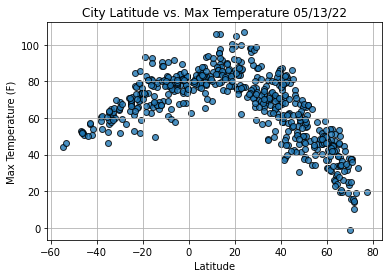

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

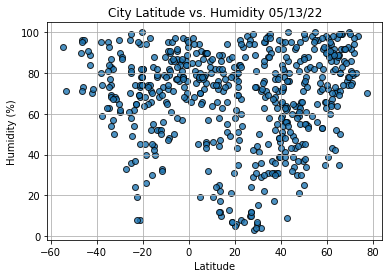

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

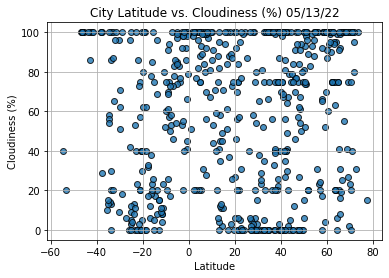

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

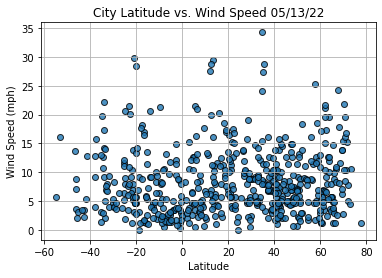

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

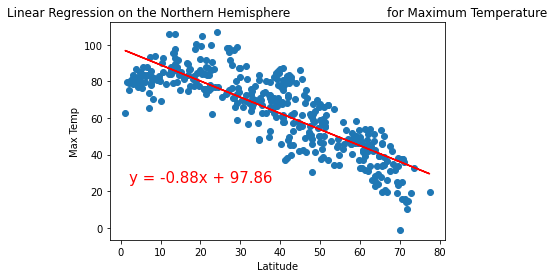

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(2,25))

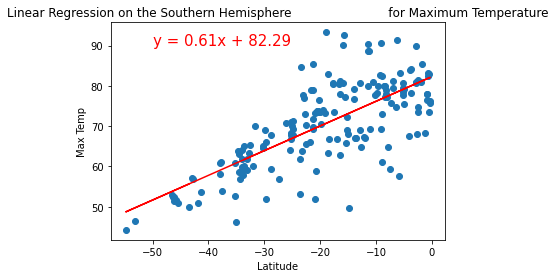

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

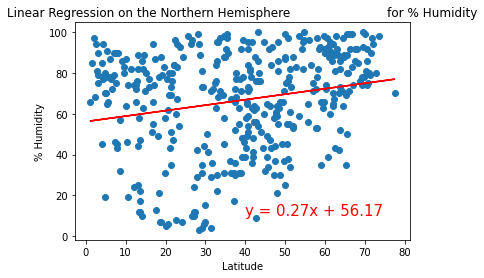

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

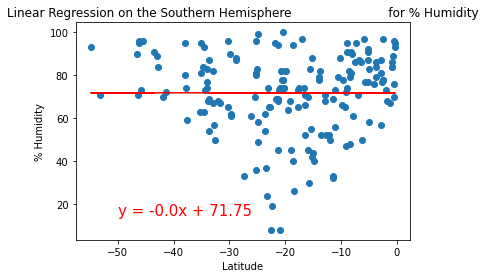

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

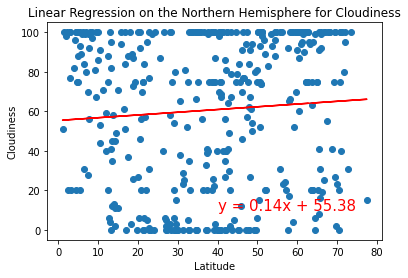

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

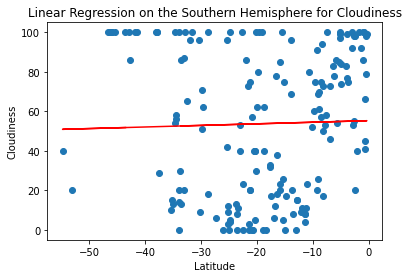

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

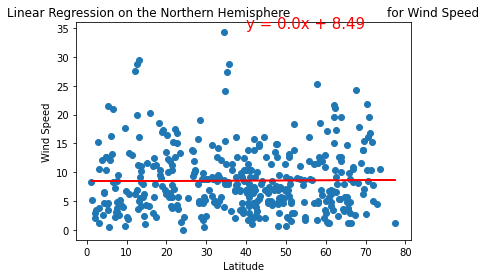

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

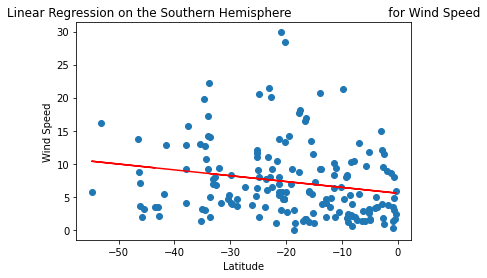

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))